In [1]:
%%bash
pip install -qU pip wheel setuptools
pip install -qU numpy pandas matplotlib scikit-learn seaborn
pip check

No broken requirements found.


## Multiclass Entropy

In [1]:
import numpy as np

labels = ['red', 'green', 'green']

def entropy(labels):
    prob_dict = {x:labels.count(x)/len(labels) for x in labels}
    probs = np.array(list(prob_dict.values()))
    return -probs.dot(np.log2(probs))

entropy(labels)

0.9182958340544896

## Maximizing Information Gain

In [3]:
%%writefile ml-bugs.csv
Species,Color,Length (mm)
Mobug,Brown,11.6
Mobug,Blue,16.3
Lobug,Blue,15.1
Lobug,Green,23.7
Lobug,Blue,18.4
Lobug,Brown,17.1
Mobug,Brown,15.7
Lobug,Green,18.6
Lobug,Blue,22.9
Lobug,Blue,21.0
Lobug,Blue,20.5
Mobug,Green,21.2
Mobug,Brown,13.8
Lobug,Blue,14.5
Lobug,Green,24.8
Mobug,Brown,18.2
Lobug,Green,17.9
Lobug,Green,22.7
Mobug,Green,19.9
Mobug,Blue,14.6
Mobug,Blue,19.2
Lobug,Brown,14.1
Lobug,Green,18.8
Mobug,Blue,13.1

Writing ml-bugs.csv


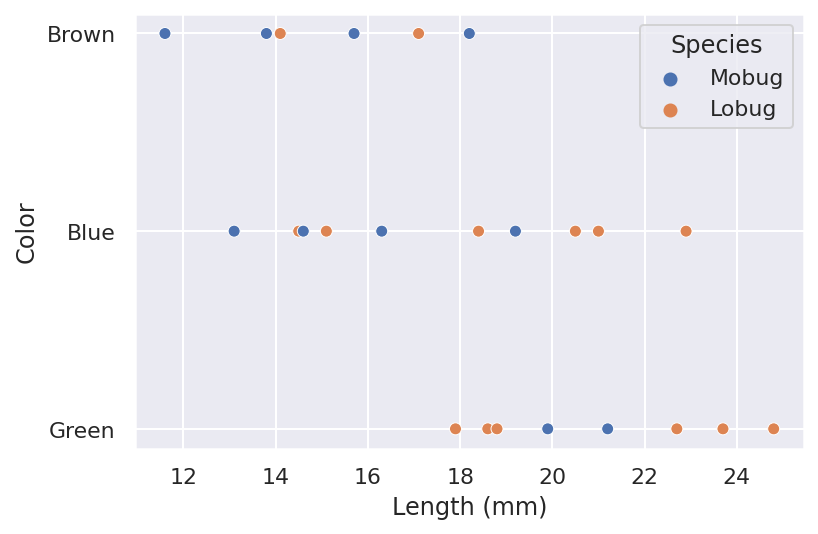

Splitting criteria for information gain as follow:
Color = Brown: 0.06157
Color = Blue: 0.00059
Color = Green: 0.04278
Length<17.0mm: 0.11261
Length<20.0mm: 0.10073


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font='DejaVu Sans')

import numpy as np
import pandas as pd

bug_df = pd.read_csv('ml-bugs.csv')
plt.figure()
ax = sns.scatterplot(data=bug_df, x='Length (mm)', y='Color', hue='Species')
plt.show()

def entropy(labels):
    prob_dict = {x:labels.count(x)/len(labels) for x in labels}
    probs = np.array(list(prob_dict.values()))
    return -probs.dot(np.log2(probs))

def information_gain(condition):
    species = bug_df['Species'].tolist()
    mask = bug_df[condition]['Species'].tolist()
    unmask = bug_df[~condition]['Species'].tolist()
    result = entropy(species) - (len(mask)/len(species) * entropy(mask) + 
        len(unmask)/len(species) * entropy(unmask))
    return result

print("Splitting criteria for information gain as follow:")
print(f"Color = Brown: {information_gain(bug_df['Color']=='Brown'):.5f}")
print(f"Color = Blue: {information_gain(bug_df['Color']=='Blue'):.5f}")
print(f"Color = Green: {information_gain(bug_df['Color']=='Green'):.5f}")
print(f"Length<17.0mm: {information_gain(bug_df['Length (mm)']<17.0):.5f}")
print(f"Length<20.0mm: {information_gain(bug_df['Length (mm)']<20.0):.5f}")

## Hyperparameters
In practice, the most common are:
- `max_depth`: The maximum number of levels in the tree.
- `min_samples_leaf`: The minimum number of samples allowed in a leaf.
- `min_samples_split`: The minimum number of samples required to split an internal node.

In [2]:
%%writefile data.csv
0.24539,0.81725,0
0.21774,0.76462,0
0.20161,0.69737,0
0.20161,0.58041,0
0.2477,0.49561,0
0.32834,0.44883,0
0.39516,0.48099,0
0.39286,0.57164,0
0.33525,0.62135,0
0.33986,0.71199,0
0.34447,0.81433,0
0.28226,0.82602,0
0.26613,0.75,0
0.26613,0.63596,0
0.32604,0.54825,0
0.28917,0.65643,0
0.80069,0.71491,0
0.80069,0.64181,0
0.80069,0.50146,0
0.79839,0.36988,0
0.73157,0.25,0
0.63249,0.18275,0
0.60023,0.27047,0
0.66014,0.34649,0
0.70161,0.42251,0
0.70853,0.53947,0
0.71544,0.63304,0
0.74309,0.72076,0
0.75,0.63596,0
0.75,0.46345,0
0.72235,0.35526,0
0.66935,0.28509,0
0.20622,0.94298,1
0.26613,0.8962,1
0.38134,0.8962,1
0.42051,0.94591,1
0.49885,0.86404,1
0.31452,0.93421,1
0.53111,0.72076,1
0.45276,0.74415,1
0.53571,0.6038,1
0.60484,0.71491,1
0.60945,0.58333,1
0.51267,0.47807,1
0.50806,0.59211,1
0.46198,0.30556,1
0.5288,0.41082,1
0.38594,0.35819,1
0.31682,0.31433,1
0.29608,0.20906,1
0.36982,0.27632,1
0.42972,0.18275,1
0.51498,0.10965,1
0.53111,0.20906,1
0.59793,0.095029,1
0.73848,0.086257,1
0.83065,0.18275,1
0.8629,0.10965,1
0.88364,0.27924,1
0.93433,0.30848,1
0.93433,0.19444,1
0.92512,0.43421,1
0.87903,0.43421,1
0.87903,0.58626,1
0.9182,0.71491,1
0.85138,0.8348,1
0.85599,0.94006,1
0.70853,0.94298,1
0.70853,0.87281,1
0.59793,0.93129,1
0.61175,0.83187,1
0.78226,0.82895,1
0.78917,0.8962,1
0.90668,0.89912,1
0.14862,0.92251,1
0.15092,0.85819,1
0.097926,0.85819,1
0.079493,0.91374,1
0.079493,0.77632,1
0.10945,0.79678,1
0.12327,0.67982,1
0.077189,0.6886,1
0.081797,0.58626,1
0.14862,0.58041,1
0.14862,0.5307,1
0.14171,0.41959,1
0.08871,0.49269,1
0.095622,0.36696,1
0.24539,0.3962,1
0.1947,0.29678,1
0.16935,0.22368,1
0.15553,0.13596,1
0.23848,0.12427,1
0.33065,0.12427,1
0.095622,0.2617,1
0.091014,0.20322,1

Overwriting data.csv


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font='DejaVu Sans')
import numpy as np
from sklearn.preprocessing import LabelEncoder

def plot_classification(model, X, y, ax=None):
    model.fit(X, y)
    
    range_features = {
        feature_name: (X[feature_name].min() - 0.3, X[feature_name].max() + 0.3)
        for feature_name in np.arange(X.shape[1])
    }
    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step)
    )
    
    # compute the associated prediction
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")
    palette = ["tab:red", "tab:blue"]
    sns.scatterplot(
        x=X.T[0], y=X.T[1], hue=y,
        ax=ax, palette=palette
    )

    return ax

The best set of parameters is: {'max_depth': 8, 'min_samples_leaf': 1}
The accuracy is 1.0


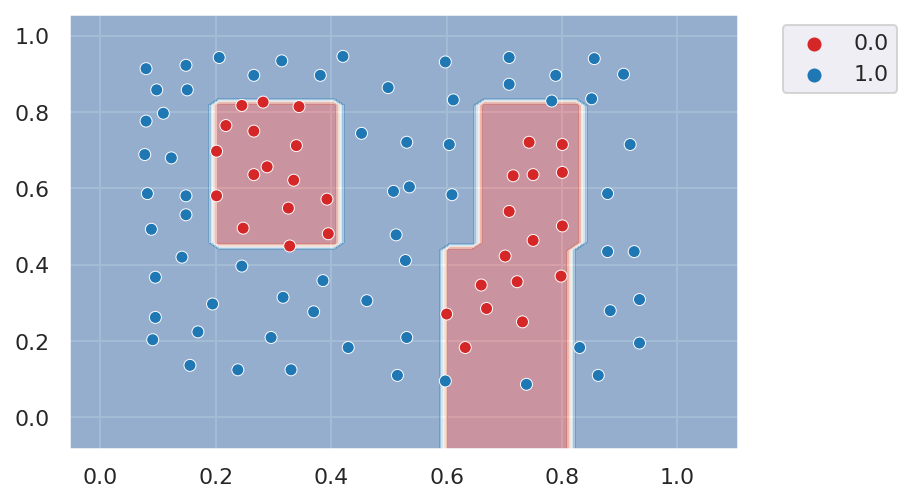

In [4]:
# Import statements
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Read the data.
data = np.asarray(pd.read_csv('data.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,:-1]
y = data[:,-1]

# TODO: Create the decision tree model and assign it to the variable model.
# You won't need to, but if you'd like, play with hyperparameters such
# as max_depth and min_samples_leaf and see what they do to the decision
# boundary.
param_grid = {
    "max_depth": np.arange(1, 10, 1),
    "min_samples_leaf": np.arange(1, 10, 1)
}
model = GridSearchCV(DecisionTreeClassifier(), cv=10,
    param_grid=param_grid, scoring='accuracy'
)

# TODO: Fit the model.
model.fit(X,y)
print(f"The best set of parameters is: "
      f"{model.best_params_}")

# TODO: Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)
print('The accuracy is', acc)

# Plot boundary solution
plot_classification(model, X, y)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()